# Customer Behavior Analysis in mobile application
## The task is to identify which users will mostly likely NOT enroll in the paid product (means application in app purchased features)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from dateutil import parser
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

## Importing the data

In [2]:
data = pd.read_csv('appdata10.csv')

## EDA

In [3]:
'''
Let's do some explanatory data analysis to get
some insight of our data
'''

data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [5]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# hmmm.. hour column has string value.. Let's handle it

'''
We're gonna convert the hour column to integer value
'''

data['hour'] = data.hour.str.slice(1,3).astype(int)

In [7]:
# Ok now let's take a look at it
data['hour'].head()

0     2
1     1
2    19
3    16
4    18
Name: hour, dtype: int64

In [8]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [9]:
# hmm that's better
'''
In this step we wanna drop some useless columns
'''
dataset = data.copy().drop(columns=['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [10]:
dataset.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


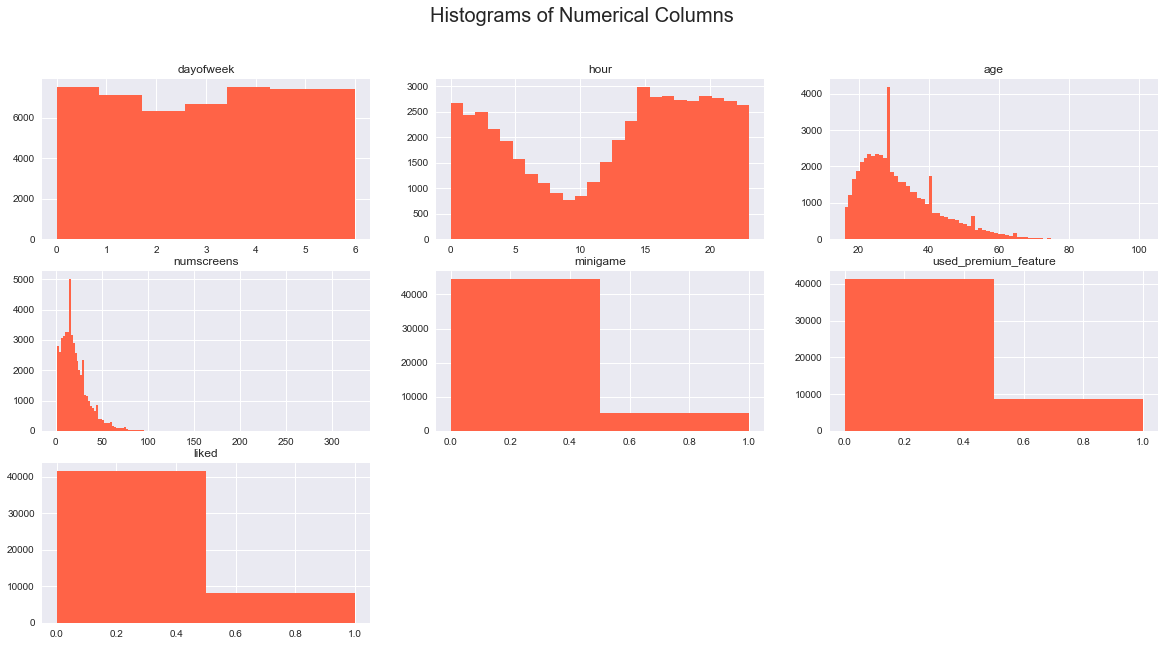

In [11]:
# Ok that seems cleaner..
'''
now let's do some visualization
'''
plt.figure(figsize=(20,10))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset.shape[1]+1): # shape[1] means #columns, +1 is because in python last item is excluded
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset.columns.values[i-1])
    vals = np.size(dataset.iloc[:, i-1].unique()) # That's for: how many bins we want in our histogram
    plt.hist(dataset.iloc[:, i-1], bins=vals, color='#FF6347')
plt.show()

### ***Ok these plots give some good insights, for example look at the hour; the hist shows us we have heavy drop at late night, seems users are dreaming!!***

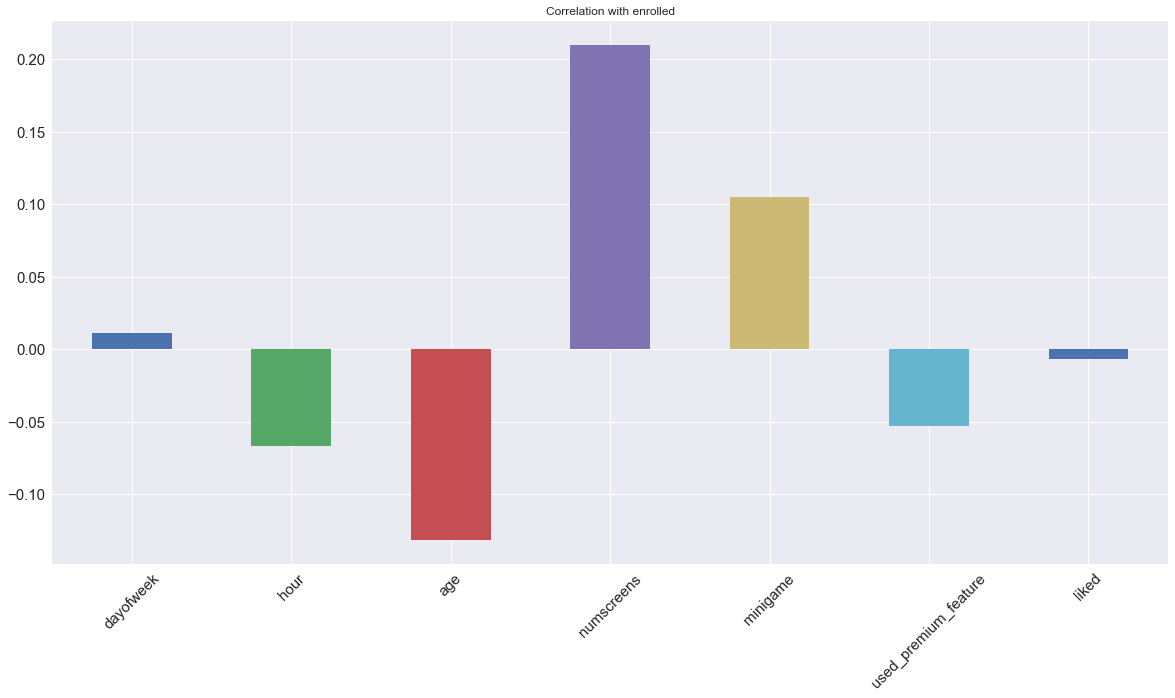

In [12]:
'''
Let's check the correlations with enrolled (response variable):
'''

dataset.corrwith(data.enrolled).plot.bar(figsize=(20,10),
                                        title='Correlation with enrolled', grid=True,
                                        fontsize=15, rot=45)# rot means every x axis label rotate 45 angle
plt.show()

### ***OK.. Intresting!!, hours: yeah we expect that,  age: seems grandpas don't like apps, Oh lovely mini games <3 ,  and Premium feature: WHAT THE HELL IS THAAAT!!! SERIOUSLY??!!! Let me kill  myself, please please please for god sake DON'T show it to the developers of this app, I'm dead sure they killing you!!!***

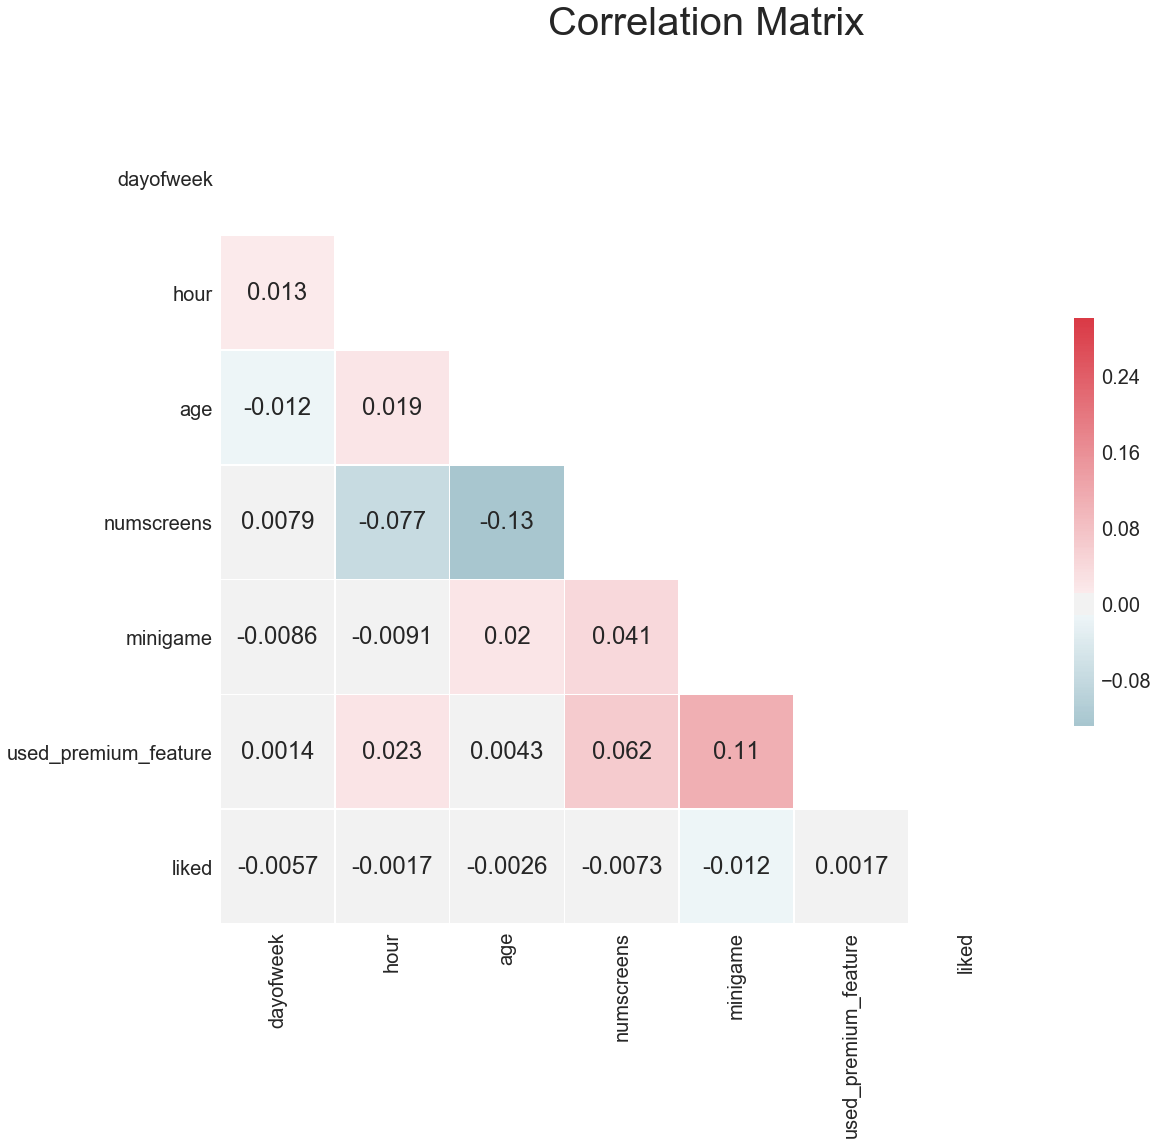

In [13]:
'''
Let's check for correlation matrix and check if we have multicolinearity or not
''' 

sns.set(style='white', font_scale=2)
corr = dataset.corr()

# Genrating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setup figure
f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix', fontsize=40)

# Custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={'shrink':0.5}, annot=True)

plt.show()

## FEATURE ENGINEERING

In [14]:
# Take a look at the features data types
print(data.dtypes)

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object


In [15]:
'''
 Convert date features to datetime object then append this column to our dataset
'''

data['first_open']=[parser.parse(row_data) for row_data in data['first_open']]

data['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else
                          row_data for row_data in data['enrolled_date']]

# we put condition in order to if null value passed not getting an error because if you pass a null value
# to parser instead of string it raise an error

In [16]:
# Let's check the type of dataset columns again
print(data.dtypes)

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object


***Well Done!***

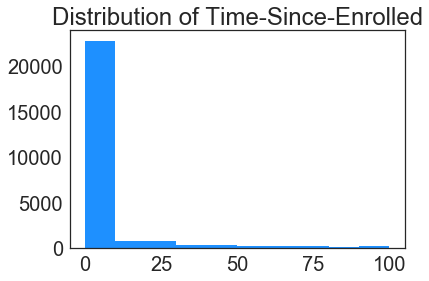

In [18]:
"""
Now we make a new feature
"""
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]') #convert to hours
plt.hist(data['difference'].dropna(), color='#1E90FF', range=[0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [19]:
# Let's consider exact 48 hours
data.loc[data.difference > 48, 'enrolled'] = 0
# every person who never enrolled it's 0 as it is already so for people who actually did enroll we
# are going to put them to 0 if they are above 48 hours

#Ok we don't need these time features anymore let's remove them
data = data.drop(columns=['difference','enrolled_date', 'first_open'])

In [20]:
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [21]:
# Let's consider the screens
'''
Remember screen is comma separate feature that contain too many screens
for use this feature we can use every screen as a separate feature but there are too many of them
it will cost too much so not a good choice
but we can use the top of them, seems possible ha??
Let's check it out!
'''
top_screens = pd.read_csv('top_screens.csv').top_screens.values
print(top_screens)

['Loan2' 'location' 'Institutions' 'Credit3Container' 'VerifyPhone'
 'BankVerification' 'VerifyDateOfBirth' 'ProfilePage' 'VerifyCountry'
 'Cycle' 'idscreen' 'Credit3Dashboard' 'Loan3' 'CC1Category' 'Splash'
 'Loan' 'CC1' 'RewardsContainer' 'Credit3' 'Credit1' 'EditProfile'
 'Credit2' 'Finances' 'CC3' 'Saving9' 'Saving1' 'Alerts' 'Saving8'
 'Saving10' 'Leaderboard' 'Saving4' 'VerifyMobile' 'VerifyHousing'
 'RewardDetail' 'VerifyHousingAmount' 'ProfileMaritalStatus'
 'ProfileChildren ' 'ProfileEducation' 'Saving7' 'ProfileEducationMajor'
 'Rewards' 'AccountView' 'VerifyAnnualIncome' 'VerifyIncomeType' 'Saving2'
 'Saving6' 'Saving2Amount' 'Saving5' 'ProfileJobTitle' 'Login'
 'ProfileEmploymentLength' 'WebView' 'SecurityModal' 'Loan4' 'ResendToken'
 'TransactionList' 'NetworkFailure' 'ListPicker']


In [22]:
# Let's check for top screens:
data['screen_list'] = data.screen_list.astype(str) + ','

for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc+',', '')

data['Other'] = data.screen_list.str.count(',')
# Ok we don't it anymore
data = data.drop(columns=["screen_list"])

In [23]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [24]:
'''
Funnels: The group of screens that belong to the same set; actually there are many screens that
corellated each other that we don't want the corellated; so we put them into the one feature instead of
independent column, therfore we group them into one funnel
'''

savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]
data['SavingsCount'] = data[savings_screens].sum(axis=1)
data  = data.drop(columns=savings_screens)


cm_screens = ["Credit1",
             "Credit2",
             "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]
data['CMCount'] = data[cm_screens].sum(axis=1)
data = data.drop(columns=cm_screens)


cc_screens = ["CC1",
             "CC1Category",
             "CC3"]
data['CCCount'] = data[cc_screens].sum(axis=1)
data = data.drop(columns=cc_screens)


loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data['LoansCount'] = data[loan_screens].sum(axis=1)
data = data.drop(columns=loan_screens)

In [25]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


## Preprocessing

In [26]:
# Ok Let's do some preprocessing to our data

'''
first we make our response vector and matrix of features
'''

X = data.drop('enrolled', axis=1)
y = data['enrolled']

In [27]:
# time to splitting the dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
20330,315793,2,20,32,5,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,10,0,2,1,2
34807,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,10,0,0,0,1
31888,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,3,0,2,0,0


In [29]:
# Ok let's separate the user
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

In [30]:
# Now it's time to feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# StandardScaler return a numpy array of multiple dimension, therefore it loses it's column name and it's index
# So we put it in different dataframe.
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


## MODELING AND EVALUATION

In [31]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0, penalty='l1')
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# Prediction
pred = lr_model.predict(X_test)

Classification Report:

              precision    recall  f1-score   support

          0       0.77      0.77      0.77      5072
          1       0.76      0.77      0.77      4928

avg / total       0.77      0.77      0.77     10000
 


The Accuracy is:
 0.7681 


Confusion Matrix:



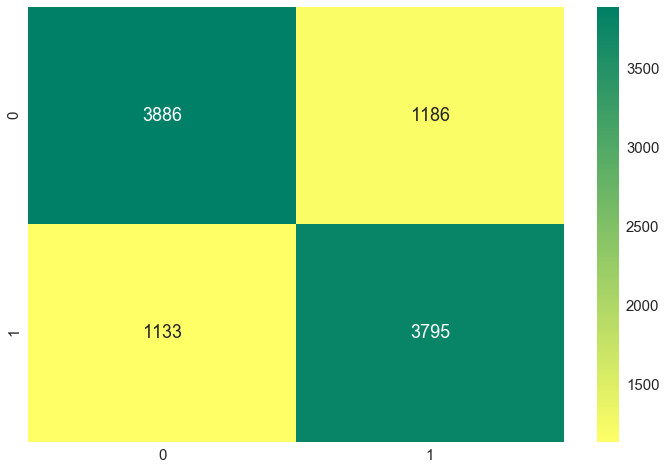

In [36]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, pred)
print("Classification Report:\n\n", classification_report(y_test,pred),'\n\n')
print("The Accuracy is:\n", accuracy_score(y_test, pred), '\n\n')
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
print("Confusion Matrix:\n")
sns.heatmap(df_cm, annot=True, fmt='g', cmap='summer_r')
plt.show()

***Good Job! nice result 'n thumbs up!***

In [40]:
# Let's do cross Validation to make sure this values are good and we have no overfitting
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr_model, X=X_train, y=y_train, cv=10)
print('Logistic Regression Accuracy: {:.3f} (+/- {:.3f})'.format(accuracies.mean(), accuracies.std()*2))

Logistic Regression Accuracy: 0.767 (+/- 0.010)


In [45]:
# Ok let's formatting the final results
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['Predicted_Results'] = pred
final_results[['user', 'enrolled', 'Predicted_Results']].reset_index(drop=True)
final_results.head(30)

,enrolled,user,Predicted_Results
11841,1,239786,1
19602,1,279644,1
45519,0,98290,0
25747,1,170150,1
42642,1,237568,1
31902,1,65042,0
30346,1,207226,1
12363,0,363062,0
32490,1,152296,1
26128,0,64484,0


# FIN